# **GEOframe transpiration**#
## **Schymanski & Or model**
This component compute the transpiration. Actually there is not a component documentation, will be provided soon on http://geoframe.blogspot.com/


### **Component Description**
For the mathematical description of this component, please refer to https://www.hydrol-earth-syst-sci.net/21/685/2017/hess-21-685-2017.pdf


| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| GEOframe | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |


| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| GEOframe | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |


### **Transpiration is different from evapotranspiration**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image

In [2]:
###########################
### SET THE FOLDER PATH ###
###########################
projFolder = '/home/drugo/Sim/OMS_Project_ET/'

In [3]:
os.chdir(projFolder)

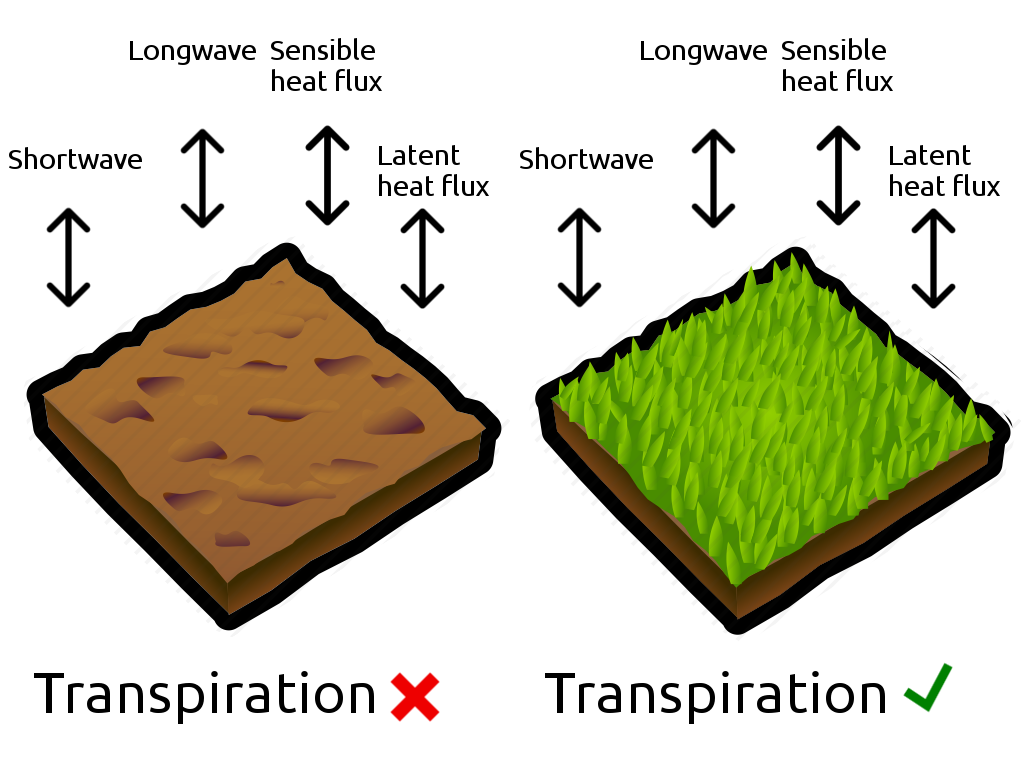

In [4]:
Image('Images/fluxes.png')

Input required:
- Air temperature
- Relative humidity
- Wind velocity
- Shortwave direct radiation
- Shortwave diffuse radiation
- Longwave radiation
- Atmospheric pressure
- Leaf Area Index (LAI)
- Stress factor
- Soil Flux
- Centroids
- Dem
- Soil water content
- Type of canopy model:
    - Flatsurface (Transpiring surface = 1)
    - Grassland (Transpiring surface = LAI)
    - MultilayerCanopy (Transpiring surface = multilayer canopy model)
    
Output:
- Latent heat both for sunlight and shaded canopy [$W/m^{2}$]
- Sensible heat both for sunlight and shaded canopy [$W/m^{2}$]
- Leaves temperature both for sunlight and shaded canopy [$W/m^{2}$]
- Total transpiration [$mm$]
- Fraction of highlighted canopy [-]
- Shortwave radiation absorbed both for sunlight and shaded canopy [$W/m^{2}$]

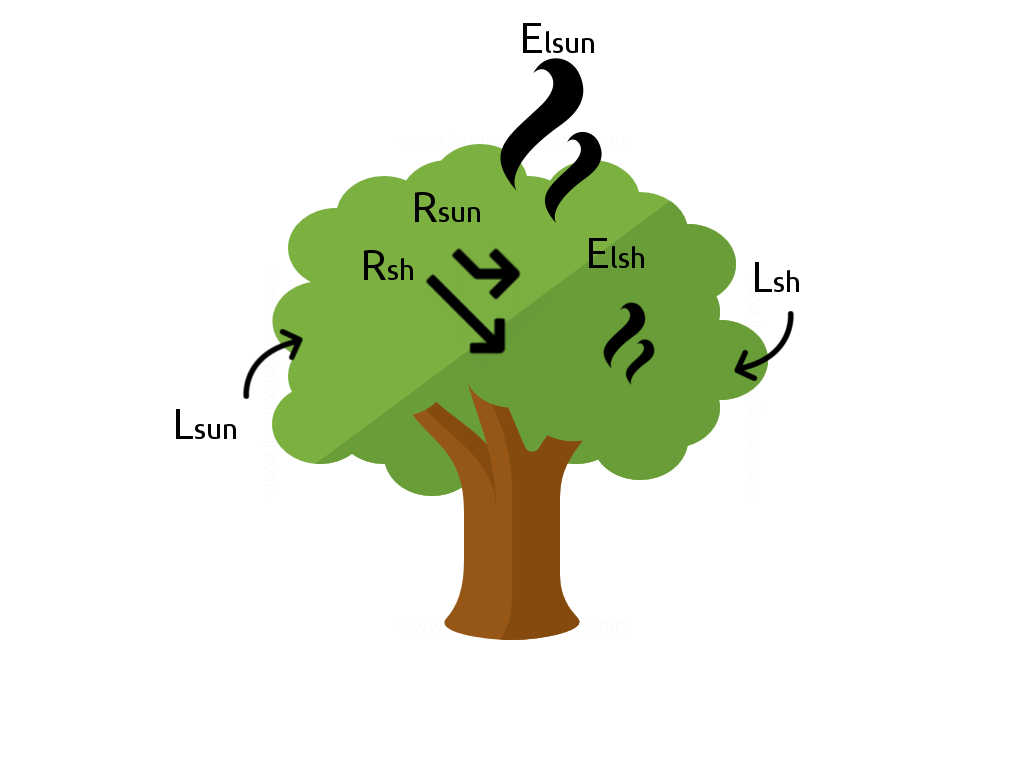

In [5]:
Image("Images/canopy.png")

In [6]:
# %load simulation/Transpiration.sim
import static oms3.SimBuilder.instance as OMS3
import static oms3.SimBuilder.*
def home = oms_prj

def startDate = "2006-07-01 00:00"
def endDate = "2006-07-31 23:30"
def timestep = 30
OMS3.sim {
	resource "$oms_prj/lib"
	model(while:"readerAirTemperature.doProcess") {
		components {
			"readerDem"											"org.jgrasstools.gears.io.rasterreader.OmsRasterReader"     
			"readerAirTemperature"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerWindVelocity"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerRelativeHumidity"							"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerShortWaveDirectRadiation"					"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerShortWaveDiffuseRadiation"					"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerLongWaveRadiation"							"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerAtmosphericPressure"							"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerLeafAreaIndex"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"readerSoilHeatFlux"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"readerCentroids"									"org.jgrasstools.gears.io.shapefile.OmsShapefileFeatureReader"		       
			"Transpiration"										"etpPointCase.OmsTranspiration"   		
			"writerLatentHeat"									"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerLatentHeatShade"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerTranspiration"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerSensibleHeat"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerSensibleHeatShade"							"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"  
			"writerLeafTemperature"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 
			"writerLeafTemperatureShade"						"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter" 
			"writerCanopy"										"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"      
			"writerRadiation"									"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"           
			"writerRadiationShade"								"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"           
			
			}
			parameter{
				// PARAMETERS
				"readerCentroids.file"							"${home}/data/Stations.shp"
				"Transpiration.idCentroids"						"id"
				"Transpiration.centroidElevation"				"Elevation" 			
				"Transpiration.doHourly"						true    
				//"Transpiration.typeOfTerrainCover"			"FlatSurface"
				"Transpiration.typeOfTerrainCover"				"Grassland"
				//"Transpiration.typeOfTerrainCover"			"MultiLayersCanopy"
                "Transpiration.temporalStep"					"${timestep}"
				"Transpiration.doFullPrint"						true   	// Print all the outputs, if false print only transpiration and latent heat
				"Transpiration.tStartDate"						"${startDate}"   
				"readerDem.file"								"${home}/data/dem.tif"	    
				
				// STRESS 
				"Transpiration.defaultStress" 					1.0           

				// READERS
				"readerAirTemperature.file"		         		"${home}/data/Temp.csv"
				"readerAirTemperature.idfield"		      		"val"  
				"readerAirTemperature.tStart"		       		"${startDate}"
				"readerAirTemperature.tEnd"						"${endDate}"
				"readerAirTemperature.tTimestep"				"${timestep}"
				"readerAirTemperature.fileNovalue"		  		"-9999.0"				        		

				"readerWindVelocity.file"		        		"${home}/data/Wind.csv" 
				"readerWindVelocity.idfield"					"val"  
				"readerWindVelocity.tStart"		      			"${startDate}"
				"readerWindVelocity.tEnd"		        		"${endDate}"
				"readerWindVelocity.tTimestep"		   			"${timestep}"
				"readerWindVelocity.fileNovalue"		 		"-9999.0"        
				
				"readerRelativeHumidity.file"		        	"${home}/data/RH.csv"
				"readerRelativeHumidity.idfield"		     	"val"  
				"readerRelativeHumidity.tStart"		      		"${startDate}"
				"readerRelativeHumidity.tEnd"		        	"${endDate}"
				"readerRelativeHumidity.tTimestep"		   		"${timestep}"
				"readerRelativeHumidity.fileNovalue"		 	"-9999.0"	
				
				"readerShortWaveDirectRadiation.file"			"${home}/data/SwDirect.csv" 
				"readerShortWaveDirectRadiation.idfield"		"val"
				"readerShortWaveDirectRadiation.tStart"			"${startDate}"
				"readerShortWaveDirectRadiation.tEnd"			"${endDate}"
				"readerShortWaveDirectRadiation.tTimestep"		"${timestep}"
				"readerShortWaveDirectRadiation.fileNovalue"	"-9999.0"				
				
				"readerShortWaveDiffuseRadiation.file"			"${home}/data/SwDiffuse.csv" 
				"readerShortWaveDiffuseRadiation.idfield"		"val"
				"readerShortWaveDiffuseRadiation.tStart"		"${startDate}"
				"readerShortWaveDiffuseRadiation.tEnd"			"${endDate}"
				"readerShortWaveDiffuseRadiation.tTimestep"		"${timestep}"
				"readerShortWaveDiffuseRadiation.fileNovalue"	"-9999.0"				
				
				"readerLongWaveRadiation.file"		       		"${home}/data/null.csv" 
				"readerLongWaveRadiation.idfield"		    	"val"
				"readerLongWaveRadiation.tStart"		     	"${startDate}"
				"readerLongWaveRadiation.tEnd"		       		"${endDate}"
				"readerLongWaveRadiation.tTimestep"		  		"${timestep}"  
				"readerLongWaveRadiation.fileNovalue"			"-9999.0"
				
				"readerAtmosphericPressure.file"		       	"${home}/data/Pres.csv" 
				"readerAtmosphericPressure.idfield"		    	"val"  
				"readerAtmosphericPressure.tStart"		     	"${startDate}"
				"readerAtmosphericPressure.tEnd"		       	"${endDate}"
				"readerAtmosphericPressure.tTimestep"		  	"${timestep}"
				"readerAtmosphericPressure.fileNovalue"			"-9999.0"       
				
				"readerLeafAreaIndex.file"		        		"${home}/data/Lai.csv" 
				"readerLeafAreaIndex.idfield"		     		"val"  
				"readerLeafAreaIndex.tStart"		      		"${startDate}"
				"readerLeafAreaIndex.tEnd"		        		"${endDate}"
				"readerLeafAreaIndex.tTimestep"		   			"${timestep}"
				"readerLeafAreaIndex.fileNovalue"		 		"-9999.0"        	
				
				"readerSoilHeatFlux.file"		        		"${home}/data/GHF.csv" 
				"readerSoilHeatFlux.idfield"		     		"val"  
				"readerSoilHeatFlux.tStart"		      			"${startDate}"
				"readerSoilHeatFlux.tEnd"		        		"${endDate}"
				"readerSoilHeatFlux.tTimestep"		   			"${timestep}"
				"readerSoilHeatFlux.fileNovalue"		 		"-9999.0"      
				
				// WRITERS
				"writerLatentHeat.file"							"${home}/output/Transpiration/evapotranspiration_Sun.csv" 
				"writerLatentHeat.tStart"						"${startDate}"
				"writerLatentHeat.tTimestep"					"${timestep}"
				
				"writerLatentHeatShade.file"					"${home}/output/Transpiration/evapotranspiration_Shade.csv" 
				"writerLatentHeatShade.tStart"					"${startDate}"
				"writerLatentHeatShade.tTimestep"				"${timestep}"
							        		        
				"writerTranspiration.file"						"${home}/output/Transpiration/Transpiration.csv" 
				"writerTranspiration.tStart"					"${startDate}"
				"writerTranspiration.tTimestep"					"${timestep}"
							        		
				"writerLeafTemperature.file"					"${home}/output/Transpiration/LeafTemperature_Sun.csv" 
				"writerLeafTemperature.tStart"					"${startDate}"
				"writerLeafTemperature.tTimestep"				"${timestep}"       
				
				"writerLeafTemperatureShade.file"				"${home}/output/Transpiration/LeafTemperature_Shade.csv" 
				"writerLeafTemperatureShade.tStart"				"${startDate}"
				"writerLeafTemperatureShade.tTimestep"			"${timestep}"       
				
				"writerRadiation.file"							"${home}/output/Transpiration/RadiationCanopy.csv" 
				"writerRadiation.tStart"						"${startDate}"
				"writerRadiation.tTimestep"						"${timestep}"       
				
				"writerRadiationShade.file"						"${home}/output/Transpiration/RadiationCanopyShaded.csv" 
				"writerRadiationShade.tStart"					"${startDate}"
				"writerRadiationShade.tTimestep"				"${timestep}"       
				
				"writerCanopy.file"								"${home}/output/Transpiration/canopy.csv" 
				"writerCanopy.tStart"							"${startDate}"
				"writerCanopy.tTimestep"						"${timestep}"       
				
				"writerSensibleHeat.file"						"${home}/output/Transpiration/HL_Sun.csv" 
				"writerSensibleHeat.tStart"						"${startDate}"
				"writerSensibleHeat.tTimestep"					"${timestep}"       
				
				"writerSensibleHeatShade.file"					"${home}/output/Transpiration/HL_Shade.csv" 
				"writerSensibleHeatShade.tStart"				"${startDate}"
				"writerSensibleHeatShade.tTimestep"				"${timestep}"        
				}
				connect {
					"readerAirTemperature.outData"				"Transpiration.inAirTemperature"
					"readerDem.outRaster"						"Transpiration.inDem"    
					"readerWindVelocity.outData"		 		"Transpiration.inWindVelocity"
					"readerRelativeHumidity.outData"		 	"Transpiration.inRelativeHumidity"
					"readerShortWaveDirectRadiation.outData"	"Transpiration.inShortWaveRadiationDirect"
					"readerShortWaveDiffuseRadiation.outData"	"Transpiration.inShortWaveRadiationDiffuse"
					"readerLongWaveRadiation.outData"			"Transpiration.inLongWaveRadiation"
					"readerAtmosphericPressure.outData"			"Transpiration.inAtmosphericPressure"
					"readerLeafAreaIndex.outData"				"Transpiration.inLeafAreaIndex"	
					"readerSoilHeatFlux.outData"				"Transpiration.inSoilFlux"	
					"readerCentroids.geodata"					"Transpiration.inCentroids"		
					"Transpiration.outLatentHeat"				"writerLatentHeat.inData"	        			        	
					"Transpiration.outLatentHeatShade"			"writerLatentHeatShade.inData"	        			        	
					"Transpiration.outTranspiration"			"writerTranspiration.inData"
					"Transpiration.outSensibleHeat"				"writerSensibleHeat.inData"
					"Transpiration.outSensibleHeatShade"		"writerSensibleHeatShade.inData"
					"Transpiration.outLeafTemperature"			"writerLeafTemperature.inData"
					"Transpiration.outLeafTemperatureShade"		"writerLeafTemperatureShade.inData"
					"Transpiration.outRadiation"				"writerRadiation.inData"
					"Transpiration.outRadiationShade"			"writerRadiationShade.inData"
					"Transpiration.outCanopy"					"writerCanopy.inData"
					}
			}
	}


SyntaxError: invalid syntax (<ipython-input-6-b8be19798ef4>, line 2)

In [18]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Transpiration.sim

Buildfile: /work/build.xml

-init:
    [mkdir] Created dir: /work/build/classes
    [mkdir] Created dir: /work/build/obj
    [mkdir] Created dir: /work/build/gensrc
    [mkdir] Created dir: /work/dist

compile-fortran:

nap:

nap_r:

nap_py:

compile-java:
    [javac] Compiling 1 source file to /work/build/classes
    [javac] warning: [options] bootstrap class path not set in conjunction with -source 1.7
    [javac] 1 warning

compile:

jar:
      [jar] Building jar: /work/dist/MaziaCaldaro.jar

all:

BUILD SUCCESSFUL
Total time: 2 seconds
Reading coverage: dem.tif
Reading features from shapefile: Stations.shp
Finished.
Finished.

*********************************
***     END OF SIMULATION     ***
*********************************



**Read the SO output**

In [19]:
nameEtpFile = 'output/Transpiration/Transpiration.csv'

In [47]:
df = pd.read_csv('output/Transpiration/Transpiration.csv',
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','El gf']
df.index = df['Datetime']
df = df.iloc[:,1:]
df.head(3)

,El gf
Datetime,
2006-07-01 00:00:00,0.018720
2006-07-01 00:30:00,0.035304
2006-07-01 01:00:00,0.019061


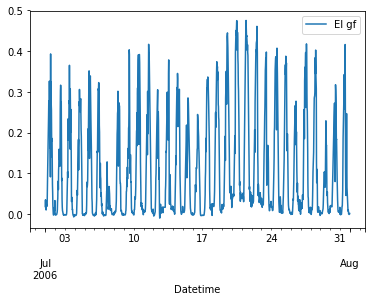

In [48]:
df.plot()

In [49]:
mask = (df.index > '2006-07-01 00:00:00') & (df.index < '2006-07-01 23:00:00')
dfDay = df.iloc[mask]
dfDay.tail()

,El gf
Datetime,
2006-07-01 20:30:00,-0.001956
2006-07-01 21:00:00,0.000014
2006-07-01 21:30:00,0.005786
2006-07-01 22:00:00,0.011722
2006-07-01 22:30:00,0.017041


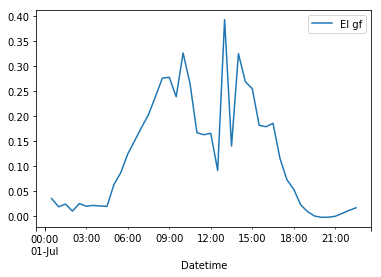

In [50]:
dfDay.plot()

## Transpiration with resistance 

Two possible ways:

In [24]:
# %load simulation/Resistance.sim
import static oms3.SimBuilder.instance as OMS3
import static oms3.SimBuilder.*
def home = oms_prj


def startDate = "2006-07-01 00:00"
def endDate = "2006-07-31 23:30"
def timestep = 30
OMS3.sim {
	resource "$oms_prj/lib"
	model(while:"readerDataTemperature.doProcess") {
		components {
			
			"readerDataTemperature"           			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataHumidity"          				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataShortWaveDirect"         		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
    		"readerDataPressure"          				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataSoilMosture"          			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"readerCentroids"							"org.jgrasstools.gears.io.shapefile.OmsShapefileFeatureReader"		       
			"Resistance"                    			"etpPointCase.OmsResistance"   
			"stressResistanceWriter"                  	"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"   
			
			}
			parameter{  			
				"readerDataTemperature.file"          	"${home}/data/Temp.csv"
				"readerDataTemperature.idfield"       	"val"  
				"readerDataTemperature.tStart"        	"${startDate}"
				"readerDataTemperature.tEnd"			"${endDate}"
				"readerDataTemperature.tTimestep"		"${timestep}"
				"readerDataTemperature.fileNovalue"   	"-9999.0"				        		
	       
					
				"readerDataHumidity.file"         		"${home}/data/RH.csv"
				"readerDataHumidity.idfield"      		"val"  
				"readerDataHumidity.tStart"       		"${startDate}"
				"readerDataHumidity.tEnd"         		"${endDate}"
				"readerDataHumidity.tTimestep"    		"${timestep}"
				"readerDataHumidity.fileNovalue"  		"-9999.0"	
				
				"readerDataShortWaveDirect.file"		"${home}/data/SwDirect.csv" 
				"readerDataShortWaveDirect.idfield"		"val"
				"readerDataShortWaveDirect.tStart"		"${startDate}"
				"readerDataShortWaveDirect.tEnd"		"${endDate}"
				"readerDataShortWaveDirect.tTimestep"	"${timestep}"
				"readerDataShortWaveDirect.fileNovalue"	"-9999.0"				
				
				"readerDataPressure.file"         		"${home}/data/Pres.csv" 
				"readerDataPressure.idfield"      		"val"  
				"readerDataPressure.tStart"       		"${startDate}"
				"readerDataPressure.tEnd"         		"${endDate}"
				"readerDataPressure.tTimestep"    		"${timestep}"
				"readerDataPressure.fileNovalue"  		"-9999.0"       
				
				"readerDataSoilMosture.file"         	"${home}/data/SWC.csv" 
				"readerDataSoilMosture.idfield"      	"val"  
				"readerDataSoilMosture.tStart"       	"${startDate}"
				"readerDataSoilMosture.tEnd"         	"${endDate}"
				"readerDataSoilMosture.tTimestep"    	"${timestep}"
				"readerDataSoilMosture.fileNovalue"  	"-9999.0"        			
				
				"Resistance.alpha" 	0.005
        		"Resistance.theta" 	0.85
       	 		"Resistance.d"  	1.1
        		"Resistance.e"  	0.63
     	
        		"Resistance.T1"  	"-5.0"
        		"Resistance.T0"  	20.0
        		"Resistance.Th"  	45.0
     	
        		"Resistance.f" 		"-40.0E-6"

        		"Resistance.thetaW"	0.205
        		"Resistance.thetaC" 0.30
        
				"readerCentroids.file"					"${home}/data/Stations.shp"
				"Resistance.idCentroids"            	"id"
				"Resistance.centroidElevation"			"Elevation"
				    		
				"stressResistanceWriter.file"        	"${home}/data/stress.csv" 
				"stressResistanceWriter.tStart"       	"${startDate}"
				"stressResistanceWriter.tTimestep"   	"${timestep}"
				}
				connect {
					"readerDataTemperature.outData"		"Resistance.inAirTemperature"
					"readerDataHumidity.outData"  		"Resistance.inRelativeHumidity"
					"readerDataShortWaveDirect.outData" "Resistance.inShortWaveRadiationDirect"
					"readerDataPressure.outData"		"Resistance.inAtmosphericPressure"
					"readerDataSoilMosture.outData"		"Resistance.inSoilMosture"	
					"readerCentroids.geodata"			"Resistance.inCentroids"		
					"Resistance.outStressResistance"	"stressResistanceWriter.inData"	        			        	
					}
			}
	}


SyntaxError: invalid syntax (<ipython-input-24-108c6e479aa9>, line 2)

In [25]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Resistance.sim

build/ folder exists: project already built.
Reading features from shapefile: Stations.shp
Finished.

*********************************
***     END OF SIMULATION     ***
*********************************



**Read Resistance output**

In [33]:
nameResFile = 'data/stress.csv'

In [51]:
dfRes = pd.read_csv(nameResFile,
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
dfRes.head(3)

,yyyy-MM-dd HH:mm,Unnamed: 2
0,2006-07-01 00:00:00,0.0
1,2006-07-01 00:30:00,0.0
2,2006-07-01 01:00:00,0.0


In [52]:
dfRes.columns = ['Datetime','stress']
dfRes.index = dfRes['Datetime']
dfRes = dfRes.iloc[:,1:]
dfRes.head(3)

,stress
Datetime,
2006-07-01 00:00:00,0.0
2006-07-01 00:30:00,0.0
2006-07-01 01:00:00,0.0


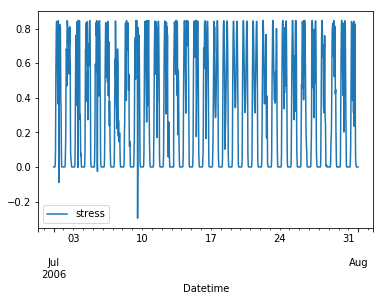

In [53]:
dfRes.plot()

### Transpiration with stress factors *

In [38]:
# %load simulation/Resistance.sim
import static oms3.SimBuilder.instance as OMS3
import static oms3.SimBuilder.*
def home = oms_prj


def startDate = "2006-07-01 00:00"
def endDate = "2006-07-31 23:30"
def timestep = 30
OMS3.sim {
	resource "$oms_prj/lib"
	model(while:"readerDataTemperature.doProcess") {
		components {
			
			"readerDataTemperature"           			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataHumidity"          				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataShortWaveDirect"         		"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
    		"readerDataPressure"          				"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerDataSoilMosture"          			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"readerCentroids"							"org.jgrasstools.gears.io.shapefile.OmsShapefileFeatureReader"		       
			"Resistance"                    			"etpPointCase.OmsResistance"   
			"stressResistanceWriter"                  	"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"   
			
			}
			parameter{  			
				"readerDataTemperature.file"          	"${home}/data/Temp.csv"
				"readerDataTemperature.idfield"       	"val"  
				"readerDataTemperature.tStart"        	"${startDate}"
				"readerDataTemperature.tEnd"			"${endDate}"
				"readerDataTemperature.tTimestep"		"${timestep}"
				"readerDataTemperature.fileNovalue"   	"-9999.0"				        		
	       
					
				"readerDataHumidity.file"         		"${home}/data/RH.csv"
				"readerDataHumidity.idfield"      		"val"  
				"readerDataHumidity.tStart"       		"${startDate}"
				"readerDataHumidity.tEnd"         		"${endDate}"
				"readerDataHumidity.tTimestep"    		"${timestep}"
				"readerDataHumidity.fileNovalue"  		"-9999.0"	
				
				"readerDataShortWaveDirect.file"		"${home}/data/SwDirect.csv" 
				"readerDataShortWaveDirect.idfield"		"val"
				"readerDataShortWaveDirect.tStart"		"${startDate}"
				"readerDataShortWaveDirect.tEnd"		"${endDate}"
				"readerDataShortWaveDirect.tTimestep"	"${timestep}"
				"readerDataShortWaveDirect.fileNovalue"	"-9999.0"				
				
				"readerDataPressure.file"         		"${home}/data/Pres.csv" 
				"readerDataPressure.idfield"      		"val"  
				"readerDataPressure.tStart"       		"${startDate}"
				"readerDataPressure.tEnd"         		"${endDate}"
				"readerDataPressure.tTimestep"    		"${timestep}"
				"readerDataPressure.fileNovalue"  		"-9999.0"       
				
				"readerDataSoilMosture.file"         	"${home}/data/SWC.csv" 
				"readerDataSoilMosture.idfield"      	"val"  
				"readerDataSoilMosture.tStart"       	"${startDate}"
				"readerDataSoilMosture.tEnd"         	"${endDate}"
				"readerDataSoilMosture.tTimestep"    	"${timestep}"
				"readerDataSoilMosture.fileNovalue"  	"-9999.0"        			
				
				"Resistance.alpha" 	0.005
        		"Resistance.theta" 	0.85
       	 		"Resistance.d"  	1.1
        		"Resistance.e"  	0.63
     	
        		"Resistance.T1"  	"-5.0"
        		"Resistance.T0"  	20.0
        		"Resistance.Th"  	45.0
     	
        		"Resistance.f" 		"-40.0E-6"

        		"Resistance.thetaW"	0.205
        		"Resistance.thetaC" 0.30
        
				"readerCentroids.file"					"${home}/data/Stations.shp"
				"Resistance.idCentroids"            	"id"
				"Resistance.centroidElevation"			"Elevation"
				    		
				"stressResistanceWriter.file"        	"${home}/data/stress.csv" 
				"stressResistanceWriter.tStart"       	"${startDate}"
				"stressResistanceWriter.tTimestep"   	"${timestep}"
				}
				connect {
					"readerDataTemperature.outData"		"Resistance.inAirTemperature"
					"readerDataHumidity.outData"  		"Resistance.inRelativeHumidity"
					"readerDataShortWaveDirect.outData" "Resistance.inShortWaveRadiationDirect"
					"readerDataPressure.outData"		"Resistance.inAtmosphericPressure"
					"readerDataSoilMosture.outData"		"Resistance.inSoilMosture"	
					"readerCentroids.geodata"			"Resistance.inCentroids"		
					"Resistance.outStressResistance"	"stressResistanceWriter.inData"	        			        	
					}
			}
	}


SyntaxError: invalid syntax (<ipython-input-38-108c6e479aa9>, line 2)

In [39]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/TranspirationResistance.sim

build/ folder exists: project already built.
Reading features from shapefile: Stations.shp
Reading coverage: dem.tif
Finished.
Finished.

*********************************
***     END OF SIMULATION     ***
*********************************



**Read Resistance output**

In [54]:
nameETRFile = 'output/TranspirationResistance/Transpiration_Stress.csv'

In [55]:
dfEtRes = pd.read_csv(nameETRFile,
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
dfEtRes.head(3)

,yyyy-MM-dd HH:mm,Unnamed: 2
0,2006-07-01 00:00:00,0.0
1,2006-07-01 00:30:00,0.0
2,2006-07-01 01:00:00,0.0


In [56]:
dfEtRes.columns = ['Datetime','Et stress']
dfEtRes.index = dfEtRes['Datetime']
dfEtRes = dfEtRes.iloc[:,1:]
dfEtRes.head(3)

,Et stress
Datetime,
2006-07-01 00:00:00,0.0
2006-07-01 00:30:00,0.0
2006-07-01 01:00:00,0.0


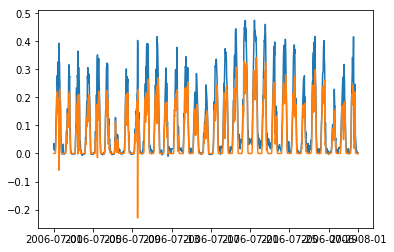

In [67]:
plt.plot(df.index,df, df.index, dfEtRes)